In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des données

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [4]:
titanic.shape

(887, 8)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Notre jeu de données est composé de 887 lignes et 8 colonnes. La liste ci-dessous présente chaque colonne ainsi que sa signification :

- **Survived** - Indique si le passager a survécu ou non
- **Pclass** - La classe dans laquelle le passager a voyagé
- **Name** - Nom du passager
- **Sex** - Genre du passager
- **Age** - Âge du passager
- **Siblings/Spouses Aboard** - Nombre de frères et sœurs ou de conjoints
- **Parents/Children Aboard** - Parents ou enfants
- **Fare** - Montant payé pour le billet

In [6]:
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### Nettoyage des données
Les colonnes sont renommées pour les rendre plus simples et faciles à utiliser.




In [7]:
titanic.rename({'Siblings/Spouses Aboard' : 'SibSp', 'Parents/Children Aboard' : 'ParCh'}, axis=1, inplace=True)

On supprime la colonne qui contient les noms des passagers.




In [8]:
titanic.drop('Name', axis=1, inplace=True)

On transforme la variable du genre du passager en une donnée numérique, en attribuant la valeur **1** pour **masculin** et **0** pour **féminin**.




In [9]:
titanic.Sex.replace({'female' : 0, 'male': 1}, inplace=True)

In [10]:
titanic.count()

Survived    887
Pclass      887
Sex         887
Age         887
SibSp       887
ParCh       887
Fare        887
dtype: int64

Le résultat de la fonction count() indique que le jeu de données ne comporte aucune colonne contenant des cellules vides.




### Séparation du Dataset
Les données sont divisées en deux ensembles : l'un regroupe les personnes ayant survécu, tandis que l'autre concerne celles qui n'ont pas survécu. Ensuite, on supprime la colonne indiquant si elles sont en vie ou non.




In [11]:
survivre = titanic.loc[ titanic.Survived == 1, 'Pclass':]

In [12]:
non_survivre = titanic.loc[ titanic.Survived == 0, 'Pclass':]

In [13]:
survivre

,Pclass,Sex,Age,SibSp,ParCh,Fare
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
8,3,0,27.0,0,2,11.1333
9,2,0,14.0,1,0,30.0708
...,...,...,...,...,...,...
871,3,0,15.0,0,0,7.2250
875,1,0,56.0,0,1,83.1583
876,2,0,25.0,0,1,26.0000
883,1,0,19.0,0,0,30.0000


### Analyse et visualtion : Survivivants

In [14]:
titanic.Sex.value_counts(normalize=True)

Sex
1    0.645998
0    0.354002
Name: proportion, dtype: float64

In [15]:
survivre.Sex.value_counts(normalize=True)

Sex
0    0.681287
1    0.318713
Name: proportion, dtype: float64

In [16]:
non_survivre.Sex.value_counts(normalize=True)

Sex
1    0.851376
0    0.148624
Name: proportion, dtype: float64

On peut noter qu'un pourcentage de **68,12%** des survivants sont des femmes, tandis que **85%** des personnes décédées sont des hommes, malgré que deux tiers des individus étant de sexe féminin.






array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'ParCh'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

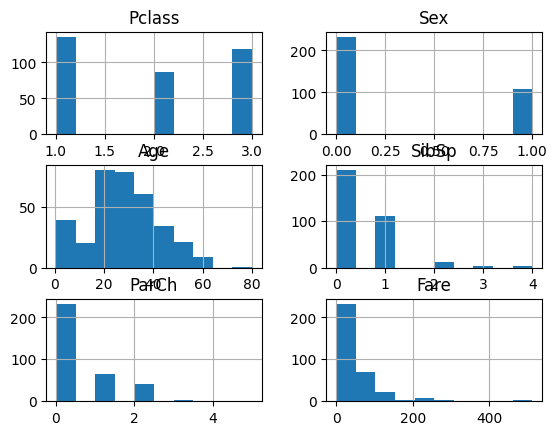

In [17]:
survivre.hist()

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'ParCh'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

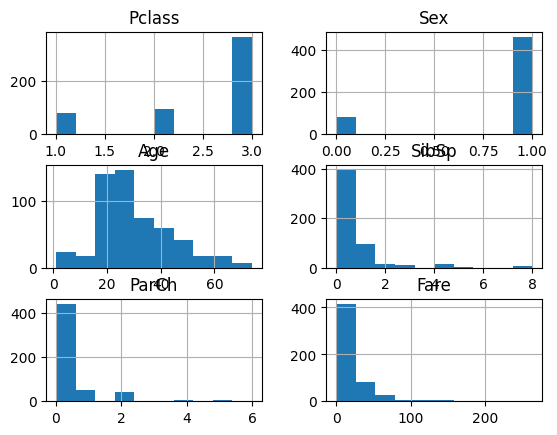

In [18]:
non_survivre.hist()

**Résultats :**
- Sexe - Les données indiquent que les femmes ont une probabilité plus élevée de survie.<br>
- Classe - Il semble que ceux qui ont opté pour la première classe présentent des taux de survie plus élevés.<br>
- Frais - Les résultats suggèrent que les passagers ayant payé des tarifs plus élevés ont davantage de chances de survivre.

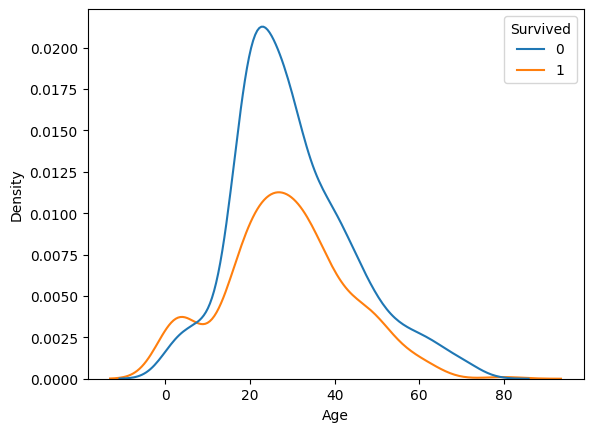

In [19]:
sns.kdeplot(data=titanic, x="Age", hue="Survived")
plt.show()

**Résultat :**
Cette figure montre qu'il y a deux pics dans la distribution des survivants : un pour les enfants de moins de 10 ans et un pour les adultes dans la vingtaine et la trentaine. Cela est probablement dû au fait que les enfants ont été prioritaires pour les canots de sauvetage




In [20]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare
Survived,1.000000,-0.336528,-0.542152,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,0.129507,-0.391492,0.085026,0.020252,-0.548919
Sex,-0.542152,0.129507,1.000000,0.091875,-0.113249,-0.244337,-0.181137
Age,-0.059665,-0.391492,0.091875,1.000000,-0.297669,-0.193741,0.112329
SibSp,-0.037082,0.085026,-0.113249,-0.297669,1.000000,0.414244,0.158839
ParCh,0.080097,0.020252,-0.244337,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,-0.181137,0.112329,0.158839,0.215470,1.000000


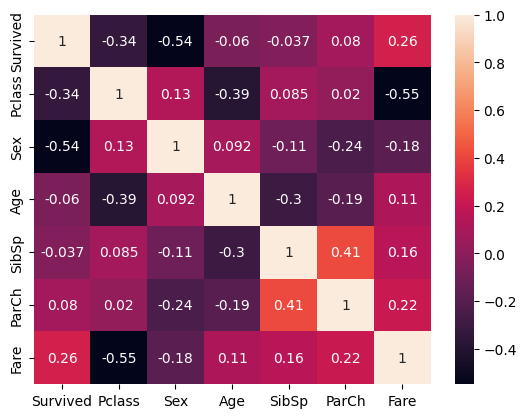

In [21]:
plt.figure()
sns.heatmap(titanic.corr(),annot=True)
plt.show()

Il est clairement observable que la corrélation entre la survie et le sexe se rapproche le plus de -1, indiquant qu'une personne de sexe féminin (sex = 0) a une probabilité de survie élevée (survived = 1). Cette constatation confirme le résultat précédent.





